# Convolutional Neural Network
### Assignment 3 - Task-3 DL6910
**Image classification using the CNN in Task 2 above, with NetVLAD layer after PL2. Use the value of K =4 in the NetVLAD.**

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import cv2

In [3]:
print(cv2.__version__)

4.1.2


### Data

In [4]:
!unrar x "/content/Used data set - Copy"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Used data set - Copy.rar

Creating    Used data set - Copy                                      OK
Creating    Used data set - Copy/002.laysan albatross                 OK
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0001_545.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0002_1027.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0003_1033.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0004_930.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0005_565.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0006_702.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0012_696.jpg     

### Exploratory Data Analysis

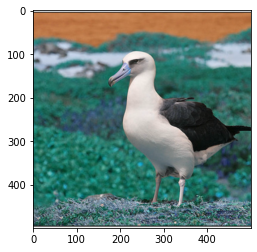

In [5]:
DATADIR="Used data set - Copy"
CATEGORIES=["002.laysan albatross","010.red winged blackbird","041.scissor tailed flycatcher","114.black throated sparrow",
            "126.nelson sharp tailed sparrow","130.tree sparrow","151.black capped vireo"]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

In [7]:
print(img_array.shape)

(500, 500, 3)


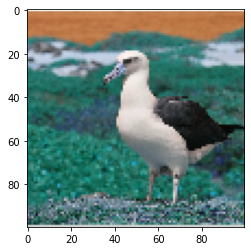

In [8]:
img_size=100
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [9]:
training_data=[]
img_size=100

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
                
            except Exception as e:
                pass
            
create_training_data()

In [10]:
print(len(training_data))

410


In [11]:
a=training_data[0][0]
a.shape

(100, 100, 3)

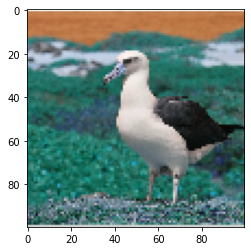

In [12]:
plt.imshow(a)

In [13]:
import random
random.shuffle(training_data)

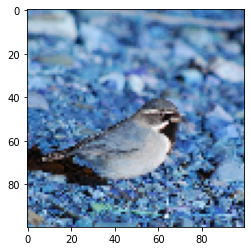

In [14]:
b=training_data[0][0]
plt.imshow(b)

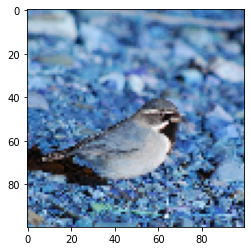

In [15]:
img_size=100
new_array=cv2.resize(b,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [ ]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,100,100,3)

### Saving the Data after Feature Engineering

In [17]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [18]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

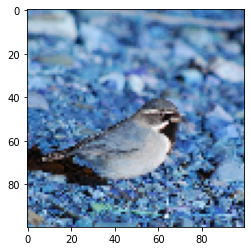

In [19]:
plt.imshow(X[0])

In [20]:
import pickle
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

### Categorization

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y=to_categorical(y,7)

In [23]:
y[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [24]:
X=X/255

In [25]:
s=X[0]
s.max()

1.0

In [26]:
X.shape

(410, 100, 100, 3)

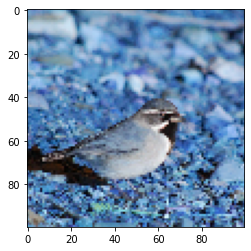

In [27]:

plt.imshow(s)

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.125,random_state=142)

In [31]:
X_train.shape

(287, 100, 100, 3)

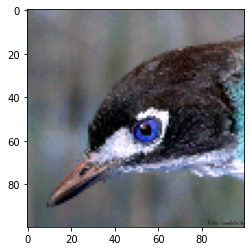

In [32]:
plt.imshow(X_train[0])

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
X_validate.shape

(41, 100, 100, 3)

In [35]:
X_test.shape

(82, 100, 100, 3)

### Saving Data after Categorization and Train Test Split
Saving data at regular interval is good as it avoids doing fresh start.

In [36]:
import pickle

pickle_out=open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out=open("X_validate.pickle","wb")
pickle.dump(X_validate,pickle_out)
pickle_out.close()

pickle_out=open("y_validate.pickle","wb")
pickle.dump(y_validate,pickle_out)
pickle_out.close()


pickle_out=open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [69]:
import pickle
X_train=pickle.load(open("X_train.pickle","rb"))
y_train=pickle.load(open("y_train.pickle","rb"))

X_validate=pickle.load(open("X_validate.pickle","rb"))
y_validate=pickle.load(open("y_validate.pickle","rb"))

X_test=pickle.load(open("X_test.pickle","rb"))
y_test=pickle.load(open("y_test.pickle","rb"))


In [70]:
X_train.shape

(287, 100, 100, 3)

## NetVLAD

In [71]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import initializers, layers
from tensorflow.keras.layers import Conv2D
import tensorflow.keras.backend as Kback

class NetVLAD(tf.keras.layers.Layer):
    """Creates a NetVLAD class.
    """
    def __init__(self,num_clusters, assign_weight_initializer=None, 
            cluster_initializer=None, skip_postnorm=False,**kwargs):
        super().__init__(**kwargs)
         
        self.K = num_clusters
        self.assign_weight_initializer = assign_weight_initializer
        self.skip_postnorm = skip_postnorm
        #self.outdim =3200
        self.cluster_initializer=cluster_initializer
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_clusters': self.K,
            'cluster_initializer': self.cluster_initializer,
            'skip_postnorm': self.skip_postnorm,
            'assign_weight_initializer': self.assign_weight_initializer,
            #'outdim': self.outdim,
        })
        return config
        
  
        

    def build(self, input_shape):
        self.D = input_shape[-1]
        self.C = self.add_weight(name='cluster_centers',
                                    shape=(1,1,1,self.D,self.K),
                                    initializer='random_normal',
                                    dtype='float32',
                                    trainable=True)

        self.conv = Conv2D(filters = self.K,kernel_size=1,strides = (1,1),
            use_bias=False, padding = 'valid',
            kernel_initializer='random_normal')
        self.conv.build(input_shape)

        #might be necessary for older versions where the weights of conv are not automatically added to
        #trainable_weights of the super-layer
        #self._trainable_weights.append(self.conv.trainable_weights[0])
        super(NetVLAD, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        
        s = self.conv(inputs)
        a = tf.nn.softmax(s)

        # Dims used hereafter: batch, H, W, desc_coeff, cluster
        # Move cluster assignment to corresponding dimension.
        a = tf.expand_dims(a,-2)

        # VLAD core.
        v = tf.expand_dims(inputs,-1)+self.C
        v = a*v
        v = tf.reduce_sum(v,axis=[1,2])
        v = tf.transpose(v,perm=[0,2,1])

        if not self.skip_postnorm:
            # Result seems to be very sensitive to the normalization method
            # details, so sticking to matconvnet-style normalization here.
            v = self.matconvnetNormalize(v, 1e-12)
            v = tf.transpose(v, perm=[0, 2, 1])
            v = self.matconvnetNormalize(tf.keras.layers.Flatten()(v), 1e-12)

        return v

    def matconvnetNormalize(self,inputs, epsilon):
        return inputs / tf.sqrt(tf.reduce_sum(inputs ** 2, axis=-1, keepdims=True)+ epsilon)
                                

    #def compute_output_shape(self, input_shape):
     #   return tuple([None, self.outdim])

### Importing Tensorflow & Keras Libraries

In [72]:
import tensorflow as tf
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.backend import l2_normalize, expand_dims, variable, constant
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU


### Model Making

In [73]:
# Model Making

model=Sequential()
model.add(Conv2D(filters=4,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))

model.add(AveragePooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())
# NETVLAD

model.add(NetVLAD(num_clusters=4)) 
model.add(BatchNormalization())
model.add(Flatten())    

model.add(Dense(28))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(7,activation='softmax'))

epochs = 300
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=True)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy'], loss_weights=[1], optimizer=sgd, metrics=['accuracy'])
# summarize model
model.summary()



#output layer


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 4)         112       
_________________________________________________________________
average_pooling2d_6 (Average (None, 49, 49, 4)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 16)        592       
_________________________________________________________________
average_pooling2d_7 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 23, 23, 16)        64        
_________________________________________________________________
net_vlad_3 (NetVLAD)         (None, 64)                128       
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)               

### Training the Model

In [76]:
history = model.fit(X_train, y_train, validation_data=(X_validate,y_validate), epochs=epochs, batch_size=16, callbacks=[lr_sc])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/300
18/18 [==============================] - 0s 23ms/step - loss: 2.0222 - accuracy: 0.1707 - val_loss: 1.9478 - val_accuracy: 0.1463 - lr: 0.0100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
Epoch 2/300
18/18 [==============================] - 0s 13ms/step - loss: 1.8872 - accuracy: 0.2544 - val_loss: 1.9622 - val_accuracy: 0.1951 - lr: 0.0100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
Epoch 3/300
18/18 [==============================] - 0s 13ms/step - loss: 1.8454 - accuracy: 0.2474 - val_loss: 1.9717 - val_accuracy: 0.1463 - lr: 0.0100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
Epoch 4/300
18/18 [==============================] - 0s 13ms/step - loss: 1.7932 - accuracy: 0.2857 - val_loss: 1.9806 - val_accuracy: 0.1220 - lr: 0.0100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.
Epoch 5/300
18/18 [=====================

### Evaluation

In [78]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,2.022174,0.170732,1.947764,0.146341,0.010000
1,1.887192,0.254355,1.962207,0.195122,0.010000
2,1.845443,0.247387,1.971730,0.146341,0.010000
3,1.793205,0.285714,1.980605,0.121951,0.010000
4,1.756285,0.254355,1.948027,0.146341,0.010000
...,...,...,...,...,...
295,0.147533,0.954704,2.836256,0.512195,0.002208
296,0.225015,0.923345,2.896315,0.512195,0.002208
297,0.162835,0.954704,3.106874,0.512195,0.002208
298,0.206393,0.926829,2.731288,0.585366,0.002208


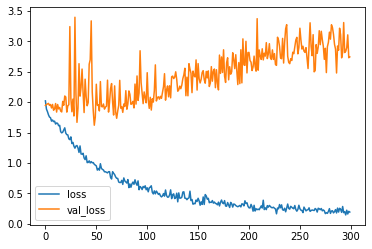

In [94]:
metrics[['loss','val_loss']].plot()

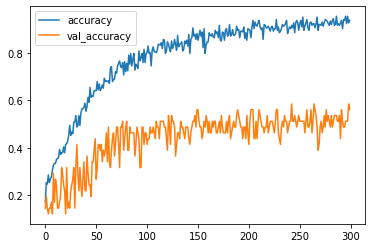

In [80]:
metrics[['accuracy','val_accuracy']].plot()

In [81]:
model.metrics_names

['loss', 'accuracy']

### Saving the Model

In [82]:
model.save('DL_ASSIGN_3_TASK_31.h5')

In [83]:
model = tf.keras.models.load_model('DL_ASSIGN_3_TASK_31.h5', custom_objects={'NetVLAD':NetVLAD(num_clusters=4)})

In [84]:
a=X_test[:5]
b=y_test[:5]
c=model.predict_classes(a)
c=to_categorical(c,7)
c

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Classification report & Confusion Matrix 

In [85]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [86]:
predictions=model.predict_classes(X_test)
predictions=to_categorical(predictions,7)

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.93      0.88      0.90        16
           2       0.25      0.30      0.27        10
           3       0.22      0.27      0.24        15
           4       0.40      0.50      0.44         4
           5       0.57      0.31      0.40        13
           6       0.20      0.27      0.23        11

   micro avg       0.46      0.46      0.46        82
   macro avg       0.48      0.45      0.46        82
weighted avg       0.52      0.46      0.48        82
 samples avg       0.46      0.46      0.46        82



In [88]:
predictions[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [89]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [90]:
print(multilabel_confusion_matrix(y_test,predictions))

[[[67  2]
  [ 5  8]]

 [[65  1]
  [ 2 14]]

 [[63  9]
  [ 7  3]]

 [[53 14]
  [11  4]]

 [[75  3]
  [ 2  2]]

 [[66  3]
  [ 9  4]]

 [[59 12]
  [ 8  3]]]


#### Prediction

In [91]:
multilabel_confusion_matrix(y_test,predictions)[0]

array([[67,  2],
       [ 5,  8]])

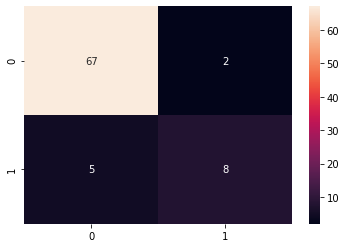

In [92]:
import seaborn as sns
sns.heatmap(multilabel_confusion_matrix(y_test,predictions)[0],annot=True)

## Done !
This model with NetVLAD performed better than previous model without NetVLAD